# Titanic Dataset Survival Prediction

In [1]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
# First Five Obervation
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* PassengerId: Unique ID given to each passenger.
* Survived: A binary column where 1 indicates the passenger survived, and 0 indicates they did not.
* Pclass: Ticket class, indicative of the socio-economic status (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
* Name: Passenger's name.
* Sex: Passenger's gender.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Ticket: Ticket number.
* Fare: Amount of money spent on the ticket.
* Cabin: Cabin number where the passenger stayed.
* Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [5]:
# Size of the Data 
print("rows",titanic.shape[0],"columns",titanic.shape[1])

rows 891 columns 15


In [6]:
# shape of the data
titanic.shape

(891, 15)

In [7]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [8]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**check the Missing values**

In [9]:
# Check the All num value present in a Data in percetage 

titanic.isnull().sum()/len(titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

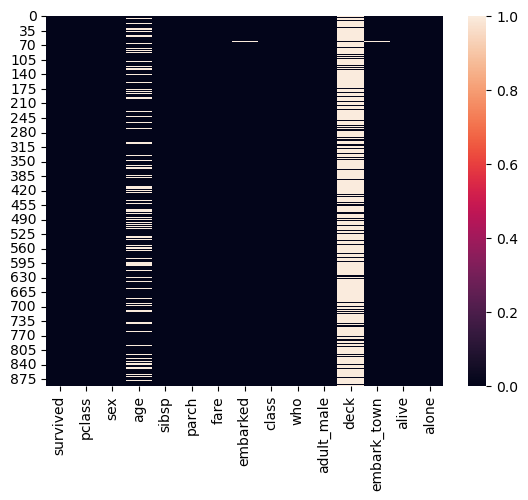

In [10]:
#  find null values using Heatmap
sns.heatmap(titanic.isnull())
plt.show()

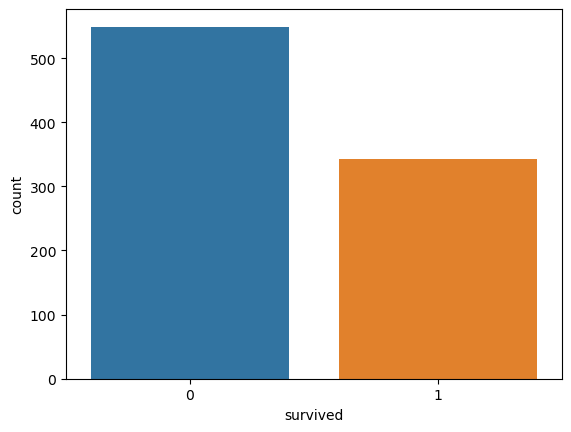

In [11]:
sns.countplot(x="survived",data=titanic)
plt.show()

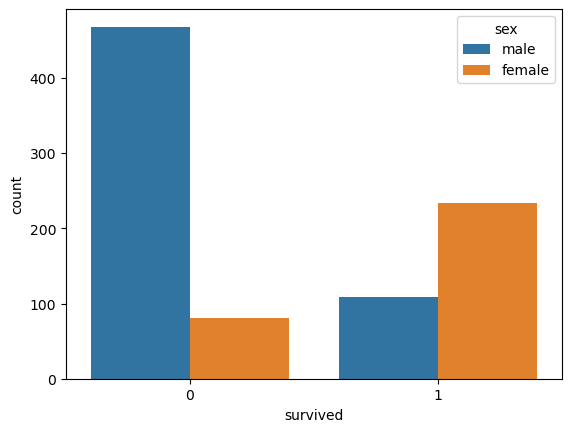

In [12]:
sns.countplot(x="survived",hue=titanic["sex"],data=titanic)
plt.show()

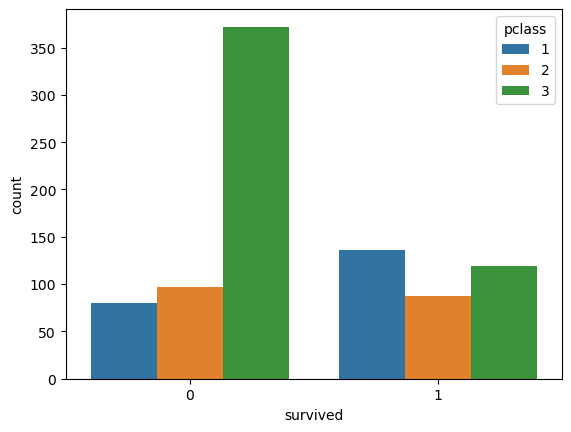

In [13]:
sns.countplot(x='survived',hue='pclass',data=titanic)
plt.show()

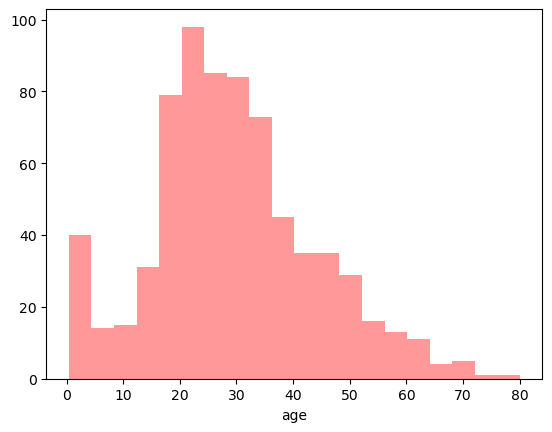

In [14]:
sns.distplot(titanic['age'].dropna(),kde=False,color='red',bins=20)
plt.show()

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


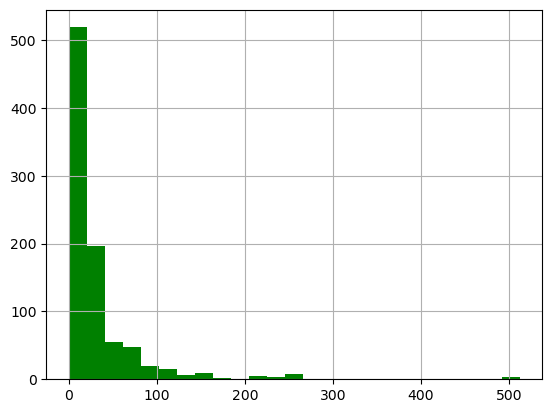

In [16]:
titanic['fare'].hist(color='green',bins=25)
plt.show()

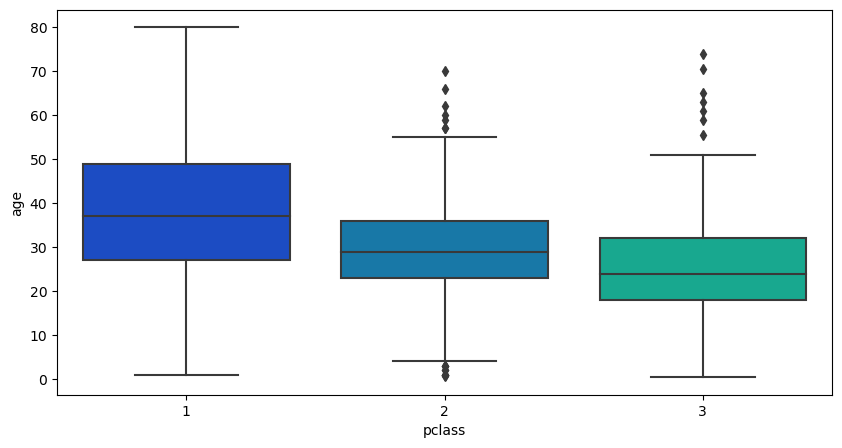

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pclass',y='age',data=titanic,palette='winter')
plt.show()

In [18]:
# Drop columns we won't use
titanic_drop = titanic.drop(columns=["deck", "alive", "embark_town", "who", "adult_male", "alone"],inplace=True,axis=1)

In [19]:
titanic.dtypes

survived       int64
pclass         int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
class       category
dtype: object

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


**Check the Survival total alive in titanic dataset**

In [21]:
survived_from_southampton = titanic[(titanic['embarked'] == 'S') & (titanic['survived'] == 1)]
# Count the number of survivors
num_survivors = len(survived_from_southampton)
num_survivors

217

In [23]:
survived_from_Queenstown = titanic[(titanic['embarked'] == 'Q') & (titanic['survived'] == 1)]
# Count the number of survivors
Q_survivors = len(survived_from_Queenstown)
Q_survivors

30

In [24]:
# Calculate total number of passengers who survived
total_survived = titanic["survived"].sum()

print(f"Total number of passengers who survived: {total_survived}")

Total number of passengers who survived: 342


**Deal with Missing Values**

In [26]:
# Handle missing values (for simplicity, fill with median for numerical columns and most frequent value for categorical columns)
titanic["age"].fillna(titanic["age"].median(), inplace=True)
titanic["embarked"].fillna(titanic['embarked'].mode(),inplace=True)

In [27]:
# Convert categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=["sex", "class", "embarked"])

In [28]:
# Check that any missing value persent in a Data
titanic.isnull().sum()

survived        0
pclass          0
age             0
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
class_First     0
class_Second    0
class_Third     0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

**Building a  Regression model**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Split the dataset into training and test datasets
X = titanic.drop("survived", axis=1)
y = titanic["survived"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 13) (179, 13) (712,) (179,)


**Training and Predicting**

In [35]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
logmodel.score(X_test,y_test)

0.7988826815642458

In [37]:
logReg_score = logmodel.score(X_test,y_test)

In [38]:
accuracy_score(y_test,logmodel.predict(X_test))

0.7988826815642458

In [39]:
predictions=logmodel.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
accuracy=confusion_matrix(y_test,predictions)

In [42]:
accuracy

array([[90, 15],
       [21, 53]], dtype=int64)

In [43]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

**Build A Rondom Forest Model**

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier and train it
final_model = RandomForestClassifier(random_state=42, n_estimators=100)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
final_model.score(X_train,y_train)

0.9789325842696629

In [64]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = final_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.56%


In [65]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [66]:
model_feature = final_model.fit(X_train,y_train)

In [67]:
features = pd.DataFrame({'imp':model_feature.feature_importances_,
                         'Features':X_train.columns}).sort_values('imp', ascending=False)

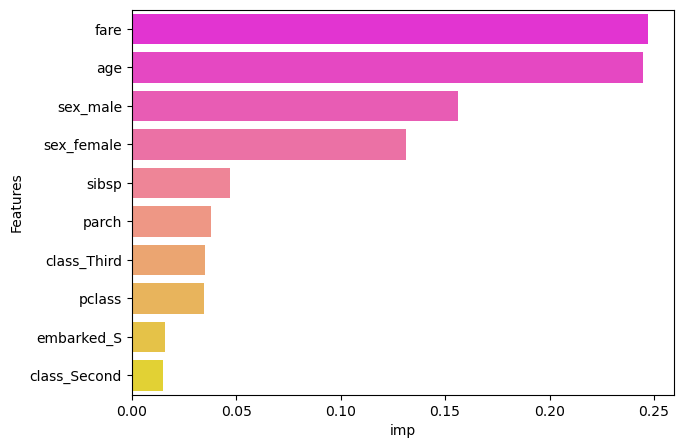

In [68]:
plt.figure(figsize=(7,5))
sns.barplot(x=features['imp'][:10],
            y=features['Features'][:10],
            palette='spring')
plt.show()

In [ ]:
# Here is a Best Feature or estimators of Titanic Survival Dataset.
# In which the best Feature is "Fare" and "Age"